In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("diabetes.csv").values
k=5

In [3]:
def e_d(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [14]:
def ini_clu(data,k):
    return data[np.random.choice(range(len(data)),k,replace=False)]

In [9]:
def assign_c(data,centroids):
    distance=np.array([[e_d(point,centroid) for centroid in centroids] for point in data])
    return np.argmin(distance,axis=1)

In [8]:
def up(data,labels,k):
    new_centroids=np.zeros((k, data.shape[1]))
    for i in range(k):
        c_p=data[labels==i]
        if len(c_p)>0:
            new_centroids[i]=np.mean(c_p,axis=0)
    return new_centroids

In [26]:
def visu(data,k,itr=10):
    centroids=ini_clu(data,k)
    for i in range(itr):
        labels=assign_c(data,centroids)
        new_centroids=up(data,labels,k)
        plt.figure(figsize=(10,12))
        plt.scatter(data[:,0],data[:,1],c=labels,cmap='viridis',edgecolor='k',s=25)
        plt.scatter(new_centroids[:,0],new_centroids[:,1],c='red',marker='x',s=200,label=f'centroid {i+1}')
        plt.title(f'k cluster {i+1}')
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
        plt.show()
        if np.all(centroids==new_centroids):
            break
        centroids=new_centroids
    return centroids,labels

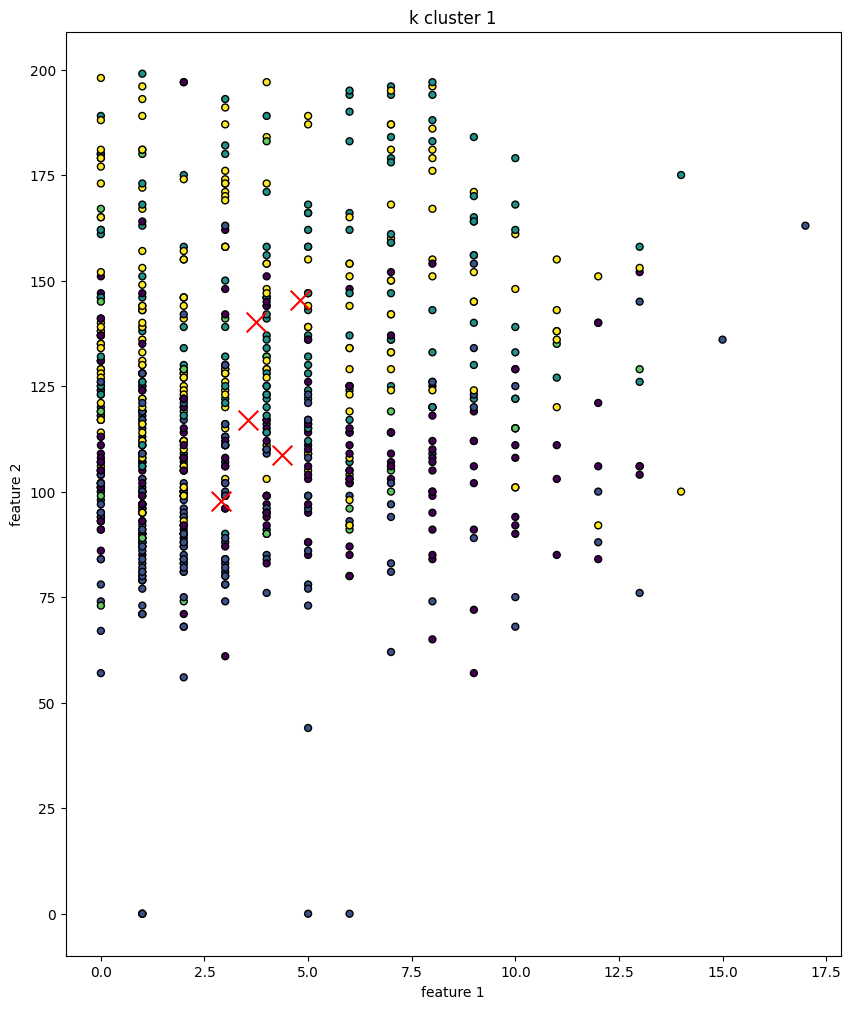

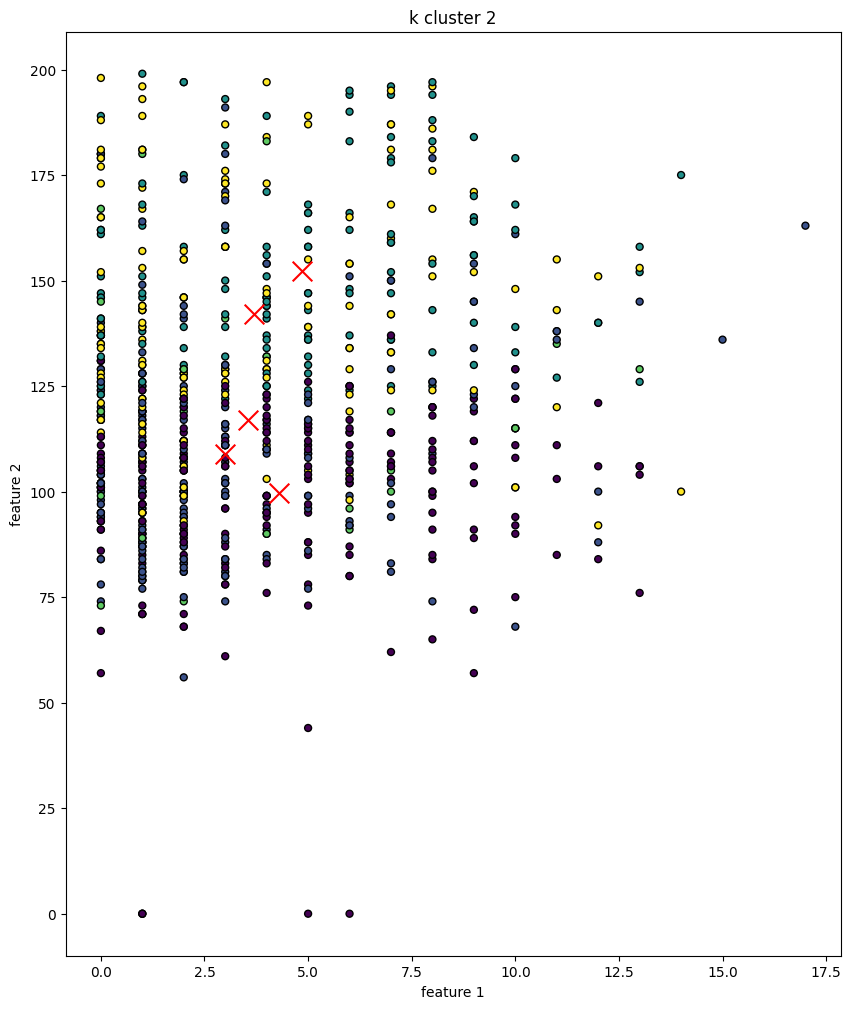

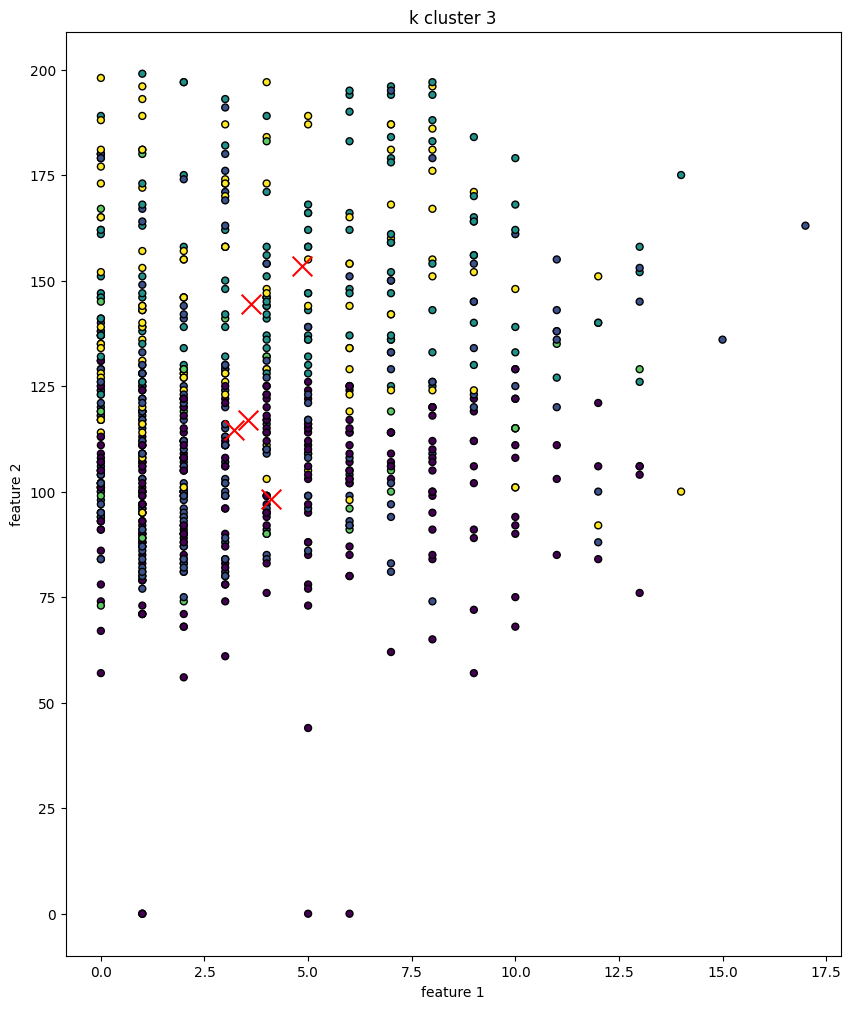

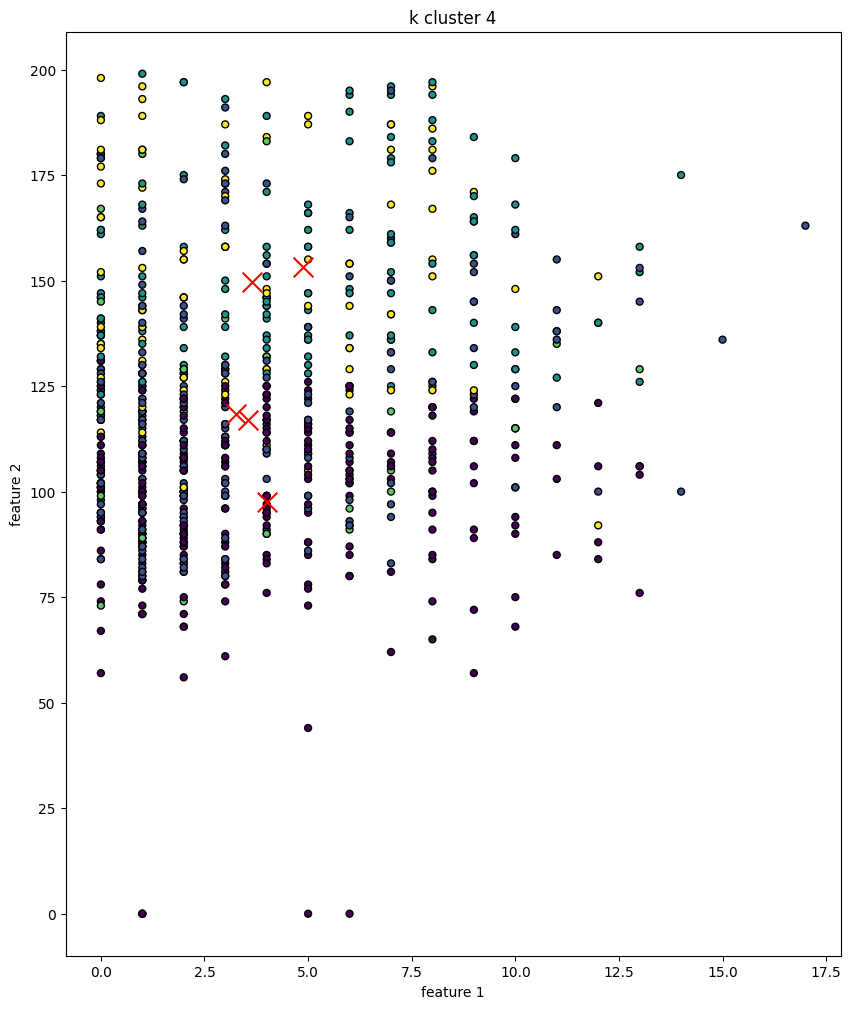

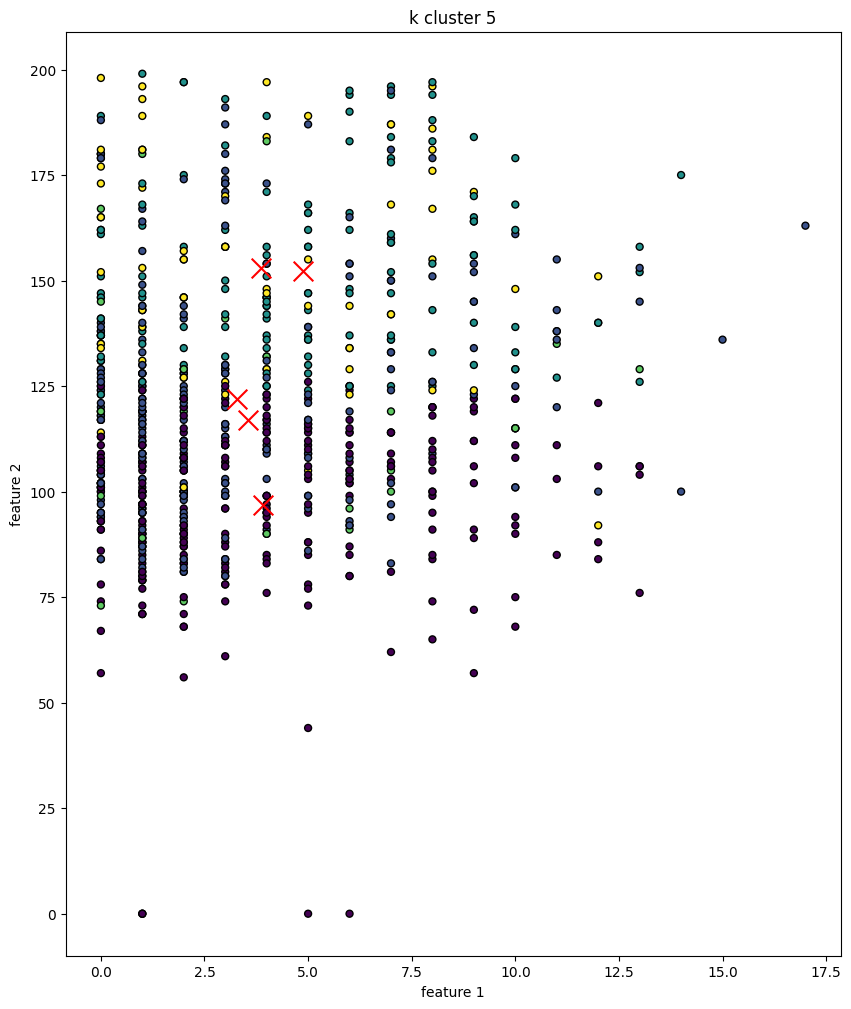

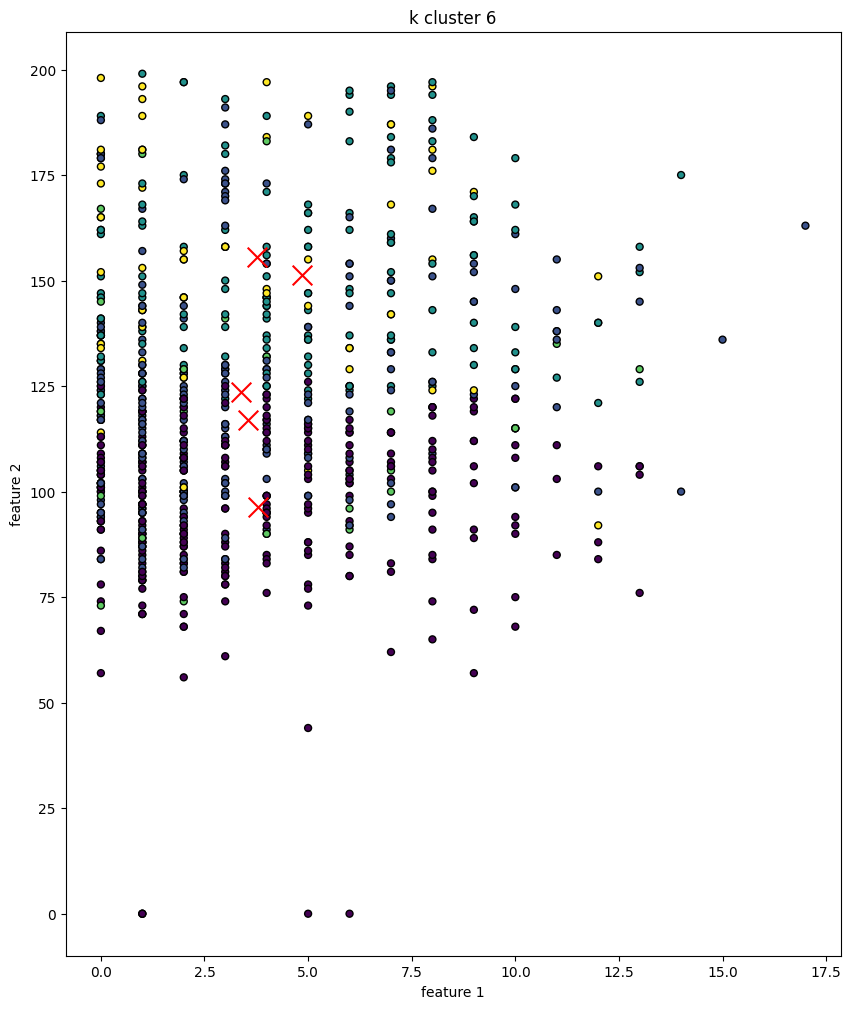

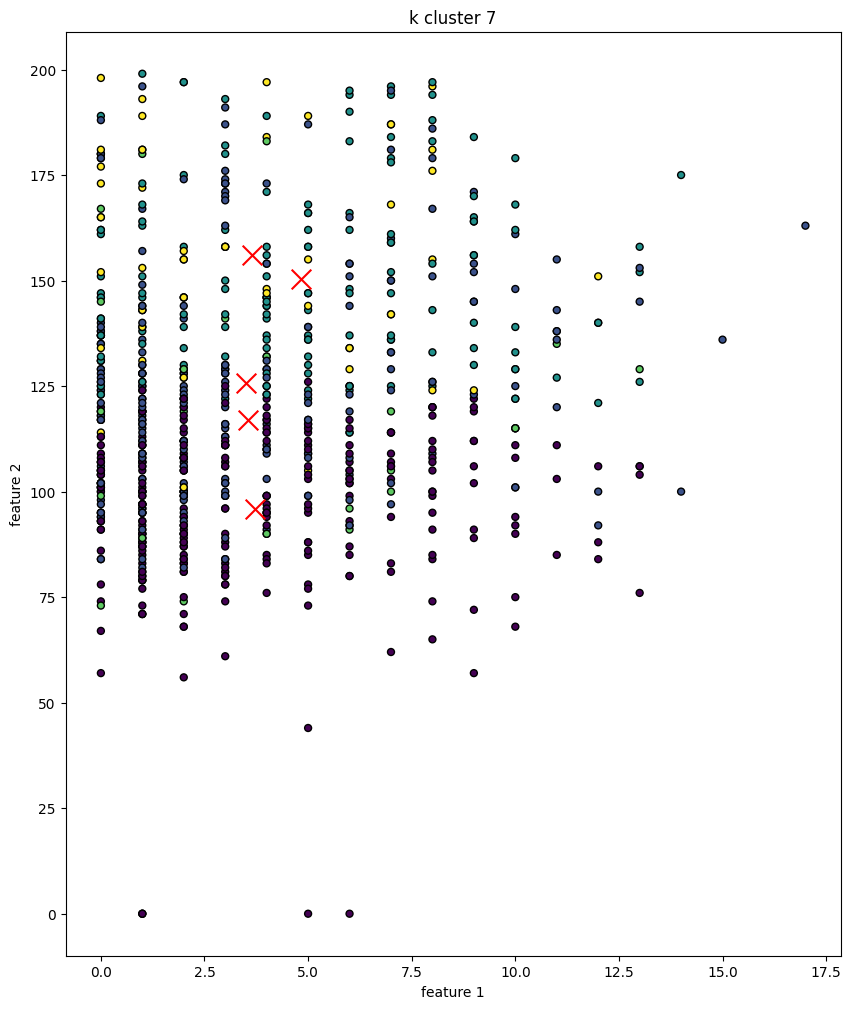

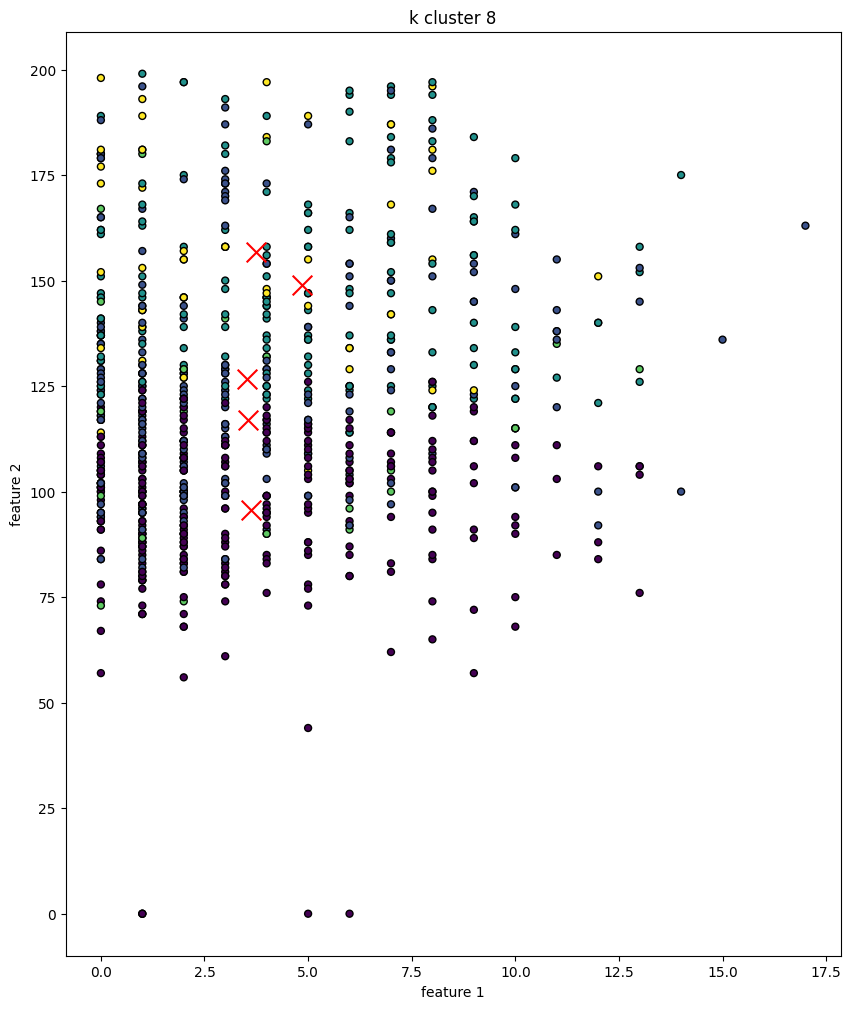

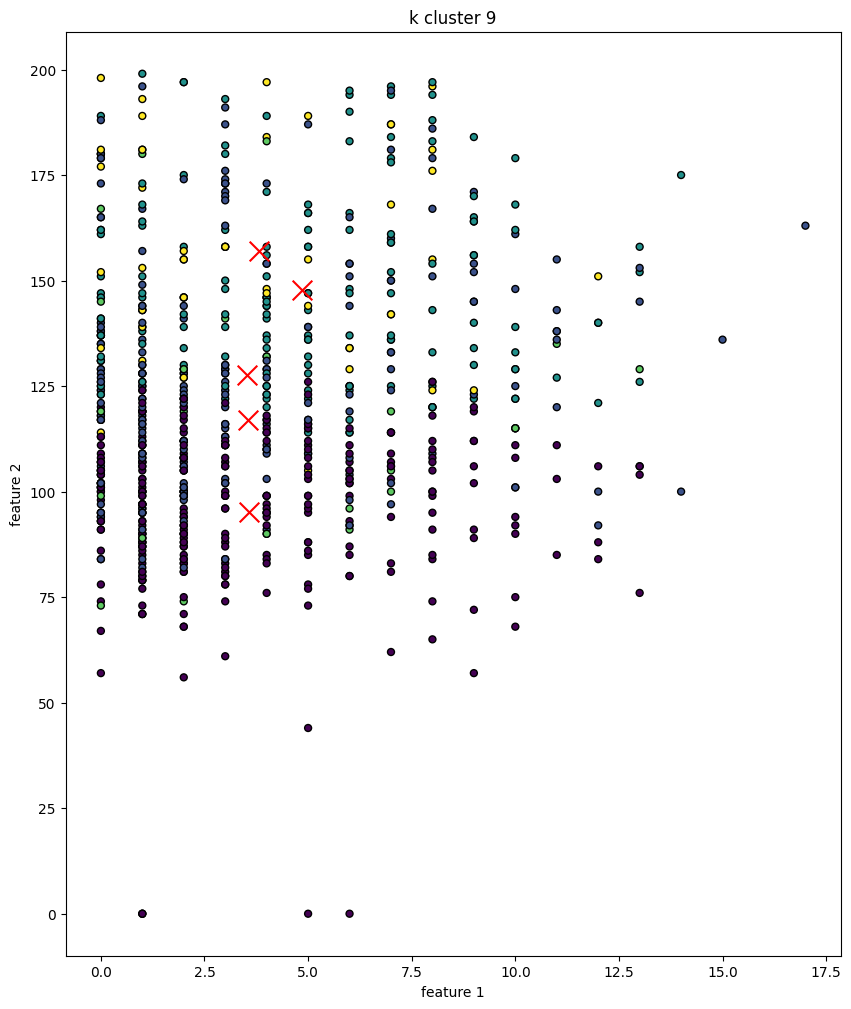

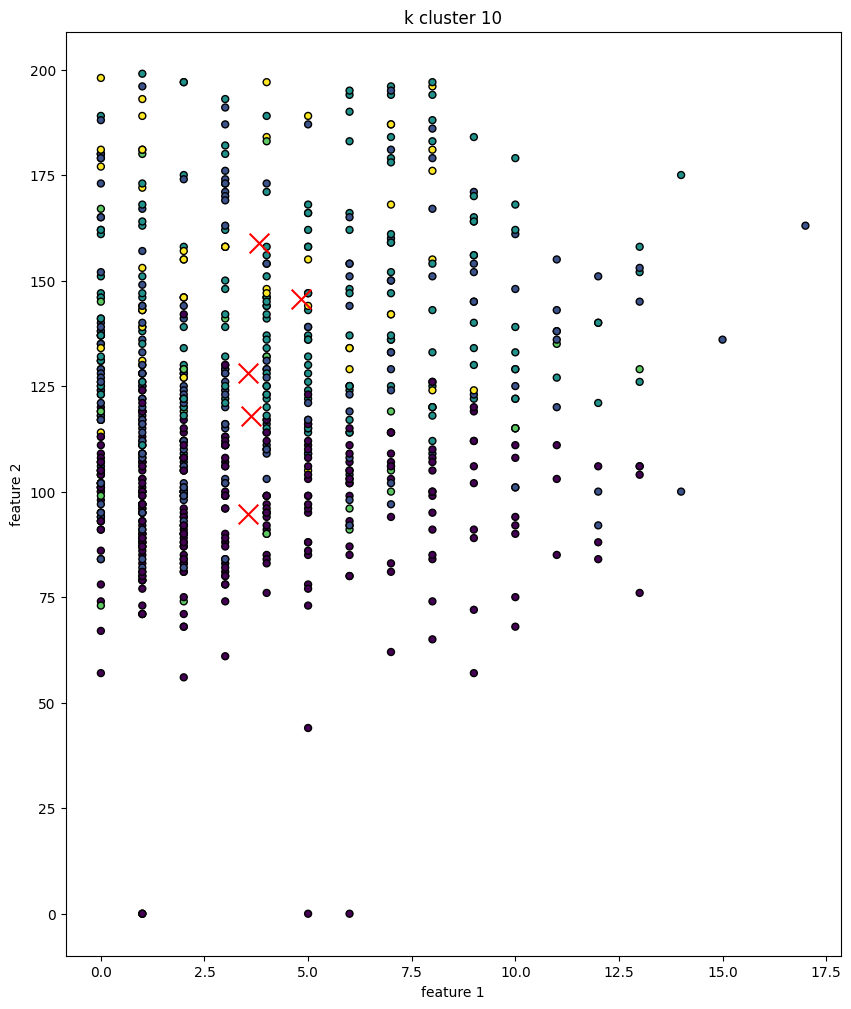

(array([[3.53819444e+00, 9.47916667e+01, 6.99965278e+01, 1.93645833e+01,
         2.32500000e+01, 3.02496528e+01, 4.18489583e-01, 3.03541667e+01,
         1.52777778e-01],
        [3.54385965e+00, 1.28048246e+02, 7.12894737e+01, 3.01535088e+01,
         1.53495614e+02, 3.38254386e+01, 5.43245614e-01, 3.18377193e+01,
         4.07894737e-01],
        [4.82352941e+00, 1.45623529e+02, 7.80588235e+01, 1.03705882e+01,
         1.54117647e+00, 3.28605882e+01, 4.62170588e-01, 4.02058824e+01,
         5.17647059e-01],
        [3.62857143e+00, 1.17800000e+02, 0.00000000e+00, 1.51428571e+00,
         0.00000000e+00, 2.57057143e+01, 3.88428571e-01, 3.07142857e+01,
         4.57142857e-01],
        [3.80851064e+00, 1.59000000e+02, 7.21276596e+01, 3.20000000e+01,
         4.11297872e+02, 3.53234043e+01, 5.50042553e-01, 3.44255319e+01,
         5.74468085e-01]]),
 array([2, 0, 2, 1, 1, 0, 0, 3, 4, 2, 0, 2, 2, 4, 1, 3, 1, 0, 0, 1, 1, 0,
        2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2,

In [27]:
visu(data,k)